# Financial and Economic Data Applications
Original from Wes McKinney (https://github.com/wesm/pydata-book/tree/1st-edition)

Updated and edited for Python circa 2018 by R. D. Slater

Note: still need to fix Cells just before Quartile/Decile Analysis


In [1]:
from __future__ import division
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
pd.options.display.max_rows = 12
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 6))

In [2]:
%matplotlib inline

In [3]:
%pwd

'/Users/Shravan/R/projects/dataMining'

## Data munging topics

### Time series and cross-section alignment

In [5]:
close_px = pd.read_csv('unit34/stock_px.csv', parse_dates=True, index_col=0)
volume = pd.read_csv('unit34/volume.csv', parse_dates=True, index_col=0)
prices = close_px.loc['2011-09-05':'2011-09-14', ['AAPL', 'JNJ', 'SPX', 'XOM']]
volume = volume.loc['2011-09-05':'2011-09-12', ['AAPL', 'JNJ', 'XOM']]

In [6]:
prices

,AAPL,JNJ,SPX,XOM
2011-09-06,379.74,64.64,1165.24,71.15
2011-09-07,383.93,65.43,1198.62,73.65
2011-09-08,384.14,64.95,1185.90,72.82
2011-09-09,377.48,63.64,1154.23,71.01
2011-09-12,379.94,63.59,1162.27,71.84
2011-09-13,384.62,63.61,1172.87,71.65
2011-09-14,389.30,63.73,1188.68,72.64


In [7]:
volume

,AAPL,JNJ,XOM
2011-09-06,18173500.0,15848300.0,25416300.0
2011-09-07,12492000.0,10759700.0,23108400.0
2011-09-08,14839800.0,15551500.0,22434800.0
2011-09-09,20171900.0,17008200.0,27969100.0
2011-09-12,16697300.0,13448200.0,26205800.0


In [8]:
prices * volume

,AAPL,JNJ,SPX,XOM
2011-09-06,6.901205e+09,1.024434e+09,NaN,1.808370e+09
2011-09-07,4.796054e+09,7.040072e+08,NaN,1.701934e+09
2011-09-08,5.700561e+09,1.010070e+09,NaN,1.633702e+09
2011-09-09,7.614489e+09,1.082402e+09,NaN,1.986086e+09
2011-09-12,6.343972e+09,8.551710e+08,NaN,1.882625e+09
2011-09-13,NaN,NaN,NaN,NaN
2011-09-14,NaN,NaN,NaN,NaN


In [82]:
vwap = (prices * volume).sum() / volume.sum()

In [83]:
vwap

AAPL    380.655181
JNJ      64.394769
SPX            NaN
XOM      72.024288
dtype: float64

In [84]:
vwap.dropna()

AAPL    380.655181
JNJ      64.394769
XOM      72.024288
dtype: float64

In [85]:
prices.align(volume, join='inner')

(              AAPL    JNJ    XOM
 2011-09-06  379.74  64.64  71.15
 2011-09-07  383.93  65.43  73.65
 2011-09-08  384.14  64.95  72.82
 2011-09-09  377.48  63.64  71.01
 2011-09-12  379.94  63.59  71.84,
                   AAPL         JNJ         XOM
 2011-09-06  18173500.0  15848300.0  25416300.0
 2011-09-07  12492000.0  10759700.0  23108400.0
 2011-09-08  14839800.0  15551500.0  22434800.0
 2011-09-09  20171900.0  17008200.0  27969100.0
 2011-09-12  16697300.0  13448200.0  26205800.0)

In [86]:
s1 = Series(range(3), index=['a', 'b', 'c'])
s2 = Series(range(4), index=['d', 'b', 'c', 'e'])
s3 = Series(range(3), index=['f', 'a', 'c'])
DataFrame({'one': s1, 'two': s2, 'three': s3})

,one,two,three
a,0.0,NaN,1.0
b,1.0,1.0,NaN
c,2.0,2.0,2.0
d,NaN,0.0,NaN
e,NaN,3.0,NaN
f,NaN,NaN,0.0


In [87]:
DataFrame({'one': s1, 'two': s2, 'three': s3}, index=list('face'))

,one,two,three
f,NaN,NaN,0.0
a,0.0,NaN,1.0
c,2.0,2.0,2.0
e,NaN,3.0,NaN


### Operations with time series of different frequencies

In [88]:
ts1 = Series(np.random.randn(3),
             index=pd.date_range('2012-6-13', periods=3, freq='W-WED'))
ts1

2012-06-13   -0.871903
2012-06-20    0.519593
2012-06-27   -0.413622
Freq: W-WED, dtype: float64

In [89]:
ts1.resample('B')

DatetimeIndexResampler [freq=<BusinessDay>, axis=0, closed=left, label=left, convention=start, base=0]

In [90]:
ts1.resample('B').ffill()

2012-06-13   -0.871903
2012-06-14   -0.871903
2012-06-15   -0.871903
2012-06-18   -0.871903
2012-06-19   -0.871903
2012-06-20    0.519593
2012-06-21    0.519593
2012-06-22    0.519593
2012-06-25    0.519593
2012-06-26    0.519593
2012-06-27   -0.413622
Freq: B, dtype: float64

In [91]:
dates = pd.DatetimeIndex(['2012-6-12', '2012-6-17', '2012-6-18',
                          '2012-6-21', '2012-6-22', '2012-6-29'])
ts2 = Series(np.random.randn(6), index=dates)
ts2

2012-06-12   -2.810509
2012-06-17   -1.887290
2012-06-18    1.538569
2012-06-21    0.152026
2012-06-22    0.483591
2012-06-29   -1.143373
dtype: float64

In [92]:
ts1.reindex(ts2.index, method='ffill')

2012-06-12         NaN
2012-06-17   -0.871903
2012-06-18   -0.871903
2012-06-21    0.519593
2012-06-22    0.519593
2012-06-29   -0.413622
dtype: float64

In [93]:
ts2 + ts1.reindex(ts2.index, method='ffill')

2012-06-12         NaN
2012-06-17   -2.759194
2012-06-18    0.666666
2012-06-21    0.671619
2012-06-22    1.003184
2012-06-29   -1.556996
dtype: float64

#### Using periods instead of timestamps

In [94]:
gdp = Series([1.78, 1.94, 2.08, 2.01, 2.15, 2.31, 2.46],
             index=pd.period_range('1984Q2', periods=7, freq='Q-SEP'))
infl = Series([0.025, 0.045, 0.037, 0.04],
              index=pd.period_range('1982', periods=4, freq='A-DEC'))
gdp

1984Q2    1.78
1984Q3    1.94
1984Q4    2.08
1985Q1    2.01
1985Q2    2.15
1985Q3    2.31
1985Q4    2.46
Freq: Q-SEP, dtype: float64

In [95]:
infl

1982    0.025
1983    0.045
1984    0.037
1985    0.040
Freq: A-DEC, dtype: float64

In [96]:
infl_q = infl.asfreq('Q-SEP', how='end')

In [97]:
infl_q

1983Q1    0.025
1984Q1    0.045
1985Q1    0.037
1986Q1    0.040
Freq: Q-SEP, dtype: float64

In [98]:
infl_q.reindex(gdp.index, method='ffill')

1984Q2    0.045
1984Q3    0.045
1984Q4    0.045
1985Q1    0.037
1985Q2    0.037
1985Q3    0.037
1985Q4    0.037
Freq: Q-SEP, dtype: float64

### Time of day and "as of" data selection

In [99]:
# Make an intraday date range and time series
rng = pd.date_range('2012-06-01 09:30', '2012-06-01 15:59', freq='T')
# Make a 5-day series of 9:30-15:59 values
rng = rng.append([rng + pd.offsets.BDay(i) for i in range(1, 4)])
ts = Series(np.arange(len(rng), dtype=float), index=rng)
ts

2012-06-01 09:30:00       0.0
2012-06-01 09:31:00       1.0
2012-06-01 09:32:00       2.0
2012-06-01 09:33:00       3.0
2012-06-01 09:34:00       4.0
2012-06-01 09:35:00       5.0
                        ...  
2012-06-06 15:54:00    1554.0
2012-06-06 15:55:00    1555.0
2012-06-06 15:56:00    1556.0
2012-06-06 15:57:00    1557.0
2012-06-06 15:58:00    1558.0
2012-06-06 15:59:00    1559.0
Length: 1560, dtype: float64

In [100]:
from datetime import time
ts[time(10, 0)]

2012-06-01 10:00:00      30.0
2012-06-04 10:00:00     420.0
2012-06-05 10:00:00     810.0
2012-06-06 10:00:00    1200.0
dtype: float64

In [101]:
ts.at_time(time(10, 0))

2012-06-01 10:00:00      30.0
2012-06-04 10:00:00     420.0
2012-06-05 10:00:00     810.0
2012-06-06 10:00:00    1200.0
dtype: float64

In [102]:
ts.between_time(time(10, 0), time(10, 1))

2012-06-01 10:00:00      30.0
2012-06-01 10:01:00      31.0
2012-06-04 10:00:00     420.0
2012-06-04 10:01:00     421.0
2012-06-05 10:00:00     810.0
2012-06-05 10:01:00     811.0
2012-06-06 10:00:00    1200.0
2012-06-06 10:01:00    1201.0
dtype: float64

In [103]:
np.random.seed(12346)

In [104]:
# Set most of the time series randomly to NA
indexer = np.sort(np.random.permutation(len(ts))[700:])
irr_ts = ts.copy()
irr_ts[indexer] = np.nan
irr_ts['2012-06-01 09:50':'2012-06-01 10:00']

2012-06-01 09:50:00    20.0
2012-06-01 09:51:00     NaN
2012-06-01 09:52:00    22.0
2012-06-01 09:53:00    23.0
2012-06-01 09:54:00     NaN
2012-06-01 09:55:00    25.0
2012-06-01 09:56:00     NaN
2012-06-01 09:57:00     NaN
2012-06-01 09:58:00     NaN
2012-06-01 09:59:00     NaN
2012-06-01 10:00:00     NaN
dtype: float64

In [105]:
selection = pd.date_range('2012-06-01 10:00', periods=4, freq='B')
irr_ts.asof(selection)

2012-06-01 10:00:00      25.0
2012-06-04 10:00:00     420.0
2012-06-05 10:00:00     810.0
2012-06-06 10:00:00    1197.0
Freq: B, dtype: float64

### Splicing together data sources

In [106]:
data1 = DataFrame(np.ones((6, 3), dtype=float),
                  columns=['a', 'b', 'c'],
                  index=pd.date_range('6/12/2012', periods=6))
data2 = DataFrame(np.ones((6, 3), dtype=float) * 2,
                  columns=['a', 'b', 'c'],
                  index=pd.date_range('6/13/2012', periods=6))
spliced = pd.concat([data1.loc[:'2012-06-14'], data2.loc['2012-06-15':]])
spliced

,a,b,c
2012-06-12,1.0,1.0,1.0
2012-06-13,1.0,1.0,1.0
2012-06-14,1.0,1.0,1.0
2012-06-15,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0


In [107]:
data2 = DataFrame(np.ones((6, 4), dtype=float) * 2,
                  columns=['a', 'b', 'c', 'd'],
                  index=pd.date_range('6/13/2012', periods=6))
spliced = pd.concat([data1.loc[:'2012-06-14'], data2.loc['2012-06-15':]])
spliced

/Users/robert.slater/test/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  after removing the cwd from sys.path.


,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,NaN
2012-06-14,1.0,1.0,1.0,NaN
2012-06-15,2.0,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0,2.0


In [108]:
spliced_filled = spliced.combine_first(data2)
spliced_filled

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,2.0
2012-06-14,1.0,1.0,1.0,2.0
2012-06-15,2.0,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0,2.0


In [109]:
spliced.update(data2, overwrite=False)

In [110]:
spliced

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,2.0
2012-06-14,1.0,1.0,1.0,2.0
2012-06-15,2.0,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0,2.0


In [111]:
cp_spliced = spliced.copy()
cp_spliced[['a', 'c']] = data1[['a', 'c']]
cp_spliced

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,2.0
2012-06-14,1.0,1.0,1.0,2.0
2012-06-15,1.0,2.0,1.0,2.0
2012-06-16,1.0,2.0,1.0,2.0
2012-06-17,1.0,2.0,1.0,2.0
2012-06-18,NaN,2.0,NaN,2.0


### Return indexes and cumulative returns

In [112]:
import datetime
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as web
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2017, 2, 1)
price = web.DataReader('AAPL', 'iex', start, end)['close']
price.index = pd.to_datetime(price.index)
price[-5:]

5y


date
2017-01-26    119.0636
2017-01-27    119.0733
2017-01-30    118.7609
2017-01-31    118.4875
2017-02-01    125.7129
Name: close, dtype: float64

In [113]:
price.loc['2015-01-02',]

102.6781

In [114]:
price['2015-01-02'] / price['2015-01-07'] - 1

0.014663883898484276

In [115]:
returns = price.pct_change()
ret_index = (1 + returns).cumprod()
ret_index[0] = 1  # Set first value to 1
ret_index

date
2015-01-02    1.000000
2015-01-05    0.971828
2015-01-06    0.971920
2015-01-07    0.985548
2015-01-08    1.023415
2015-01-09    1.024513
                ...   
2017-01-25    1.159011
2017-01-26    1.159581
2017-01-27    1.159676
2017-01-30    1.156633
2017-01-31    1.153971
2017-02-01    1.224340
Name: close, Length: 525, dtype: float64

In [116]:
m_returns = ret_index.resample('BM').last().pct_change()
m_returns['2015']

date
2015-01-30         NaN
2015-02-27    0.100776
2015-03-31   -0.031371
2015-04-30    0.005786
2015-05-29    0.045340
2015-06-30   -0.037266
2015-07-31   -0.032888
2015-08-31   -0.066197
2015-09-30   -0.021816
2015-10-30    0.083410
2015-11-30   -0.005805
2015-12-31   -0.110228
Freq: BM, Name: close, dtype: float64

In [117]:
m_rets = (1 + returns).resample('M', kind='period').prod() - 1
m_rets['2015']

date
2015-01    0.071618
2015-02    0.100776
2015-03   -0.031371
2015-04    0.005786
2015-05    0.045340
2015-06   -0.037266
2015-07   -0.032888
2015-08   -0.066197
2015-09   -0.021816
2015-10    0.083410
2015-11   -0.005805
2015-12   -0.110228
Freq: M, Name: close, dtype: float64

## Group transforms and analysis

In [118]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 10
np.random.seed(12345)

In [119]:
import random; random.seed(0)
import string

N = 1000
def rands(n):
    choices = string.ascii_uppercase
    return ''.join([random.choice(choices) for _ in range(n)])
tickers = np.array([rands(5) for _ in range(N)])

In [120]:
M = 500
df = DataFrame({'Momentum' : np.random.randn(M) / 200 + 0.03,
                'Value' : np.random.randn(M) / 200 + 0.08,
                'ShortInterest' : np.random.randn(M) / 200 - 0.02},
                index=tickers[:M])

In [121]:
ind_names = np.array(['FINANCIAL', 'TECH'])
sampler = np.random.randint(0, len(ind_names), N)
industries = Series(ind_names[sampler], index=tickers,
                    name='industry')

In [122]:
by_industry = df.groupby(industries)
by_industry.mean()

,Momentum,Value,ShortInterest
industry,,,
FINANCIAL,0.029485,0.079929,-0.020739
TECH,0.030407,0.080113,-0.019609


In [123]:
by_industry.describe()

Momentum                                            ...     \
             count      mean       std       min       25%    ...      
industry                                                      ...      
FINANCIAL    246.0  0.029485  0.004802  0.017210  0.026263    ...      
TECH         254.0  0.030407  0.005303  0.016778  0.026456    ...      

          ShortInterest                                          
                    min       25%       50%       75%       max  
industry                                                         
FINANCIAL     -0.036997 -0.024138 -0.020833 -0.017345 -0.006322  
TECH          -0.032682 -0.022779 -0.019829 -0.016923 -0.003698  

[2 rows x 24 columns]

In [124]:
# Within-Industry Standardize
def zscore(group):
    return (group - group.mean()) / group.std()

df_stand = by_industry.apply(zscore)

In [125]:
df_stand.groupby(industries).agg(['mean', 'std'])

Momentum              Value      ShortInterest     
                   mean  std          mean  std          mean  std
industry                                                          
FINANCIAL  1.114736e-15  1.0  8.001278e-15  1.0  3.081772e-15  1.0
TECH      -2.779929e-16  1.0 -7.139521e-15  1.0 -1.910982e-15  1.0

In [126]:
# Within-industry rank descending
ind_rank = by_industry.rank(ascending=False)
ind_rank.groupby(industries).agg(['min', 'max'])

Momentum        Value        ShortInterest       
               min    max   min    max           min    max
industry                                                   
FINANCIAL      1.0  246.0   1.0  246.0           1.0  246.0
TECH           1.0  254.0   1.0  254.0           1.0  254.0

In [127]:
# Industry rank and standardize
by_industry.apply(lambda x: zscore(x.rank()))

,Momentum,Value,ShortInterest
MYNBI,-0.091346,-1.004802,-0.976696
QPMZJ,0.794005,-0.358356,1.299919
PLSGQ,-0.541047,-1.679355,-0.836164
EJEYD,-0.583207,0.990749,-1.623142
TZIRW,1.572120,0.374314,-0.265423
ZTEJD,1.395171,-1.436006,0.360703
XCVKP,-0.074863,-0.660154,0.632931
RDLNK,0.238200,0.102086,-0.319869
TUGRP,1.075068,1.580983,1.665302
OQIBZ,1.412345,-1.313972,0.358356


### Group factor exposures

In [128]:
from numpy.random import rand
fac1, fac2, fac3 = np.random.rand(3, 1000)

ticker_subset = tickers.take(np.random.permutation(N)[:1000])

# Weighted sum of factors plus noise
port = Series(0.7 * fac1 - 1.2 * fac2 + 0.3 * fac3 + rand(1000),
              index=ticker_subset)
factors = DataFrame({'f1': fac1, 'f2': fac2, 'f3': fac3},
                    index=ticker_subset)

In [129]:
factors.corrwith(port)

f1    0.402377
f2   -0.680980
f3    0.168083
dtype: float64

In [130]:
from pyfinance.ols import PandasRollingOLS
model=PandasRollingOLS(y=port, x=factors,window=10)
model.beta

,f1,f2,f3
FYNCS,1.523291,-1.301151,0.514681
MTSHZ,1.703277,-1.139683,0.547610
OMLRE,1.590718,-1.075082,0.266399
OCNQR,1.653191,-1.035805,0.247607
XRHDX,1.514009,-0.760738,0.277267
TASQL,1.482487,-0.570713,0.322039
PVKPP,1.412132,-0.528023,0.320582
IVPZY,1.302049,-0.499206,0.414142
VOLSW,1.177061,-0.673796,0.513970
FEZAR,0.858180,-0.870596,0.917122


In [170]:
def beta_exposure(chunk, factors=None):
    return PandasRollingOLS(y=chunk, x=factors).beta

In [171]:
by_ind = port.groupby(industries)
exposures = by_ind.apply(beta_exposure, factors=factors)
exposures.unstack()

TypeError: '>' not supported between instances of 'NoneType' and 'int'

### Decile and quartile analysis

In [133]:
import pandas_datareader.data as web
start = datetime.datetime(2015,1,1)
end = datetime.datetime(2018,1,1)
data = web.DataReader('SPY','iex', start, end)
data.index = pd.to_datetime(data.index)
data.info()

5y
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 755 entries, 2015-01-02 to 2017-12-29
Data columns (total 5 columns):
open      755 non-null float64
high      755 non-null float64
low       755 non-null float64
close     755 non-null float64
volume    755 non-null int64
dtypes: float64(4), int64(1)
memory usage: 35.4 KB


In [134]:
px = data['close']
returns = px.pct_change()

def to_index(rets):
    index = (1 + rets).cumprod()
    first_loc = max(index.index.get_loc(index.idxmax()) - 1, 0)
    index.values[first_loc] = 1
    return index

def trend_signal(rets, lookback, lag):
    signal = rets.rolling(lookback,lookback - 5).sum()
    return signal.shift(lag)

In [135]:
signal = trend_signal(returns, 100, 3)
x=signal.resample('B').ffill()
trade_friday = x.resample('W-FRI').ffill()
trade_rets = trade_friday.shift(1) * returns
trade_rets = trade_rets[:len(returns)]

In [136]:
trade_rets

date
2015-01-02         NaN
2015-01-05         NaN
2015-01-06         NaN
2015-01-07         NaN
2015-01-08         NaN
2015-01-09         NaN
2015-01-12         NaN
2015-01-13         NaN
2015-01-14         NaN
2015-01-15         NaN
2015-01-16         NaN
2015-01-20         NaN
2015-01-21         NaN
2015-01-22         NaN
2015-01-23         NaN
2015-01-26         NaN
2015-01-27         NaN
2015-01-28         NaN
2015-01-29         NaN
2015-01-30         NaN
2015-02-02         NaN
2015-02-03         NaN
2015-02-04         NaN
2015-02-05         NaN
2015-02-06         NaN
2015-02-09         NaN
2015-02-10         NaN
2015-02-11         NaN
2015-02-12         NaN
2015-02-13         NaN
2015-02-17         NaN
2015-02-18         NaN
2015-02-19         NaN
2015-02-20         NaN
2015-02-23         NaN
2015-02-24         NaN
2015-02-25         NaN
2015-02-26         NaN
2015-02-27         NaN
2015-03-02         NaN
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-0

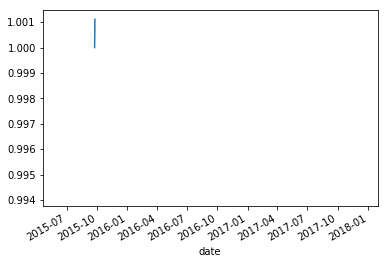

In [137]:
to_index(trade_rets).plot()

In [138]:
vol = returns.rolling(250, min_periods=200).std() * np.sqrt(250)

def sharpe(rets, ann=250):
    return rets.mean() / rets.std()  * np.sqrt(ann)

In [139]:
cats = pd.qcut(vol, 4)
print('cats: %d, trade_rets: %d, vol: %d' % (len(cats), len(trade_rets), len(vol)))

cats: 755, trade_rets: 755, vol: 755


In [140]:
trade_rets.groupby(cats).agg(sharpe)

close
(0.0659, 0.0947]    9.545126
(0.0947, 0.139]     4.088510
(0.139, 0.16]      -3.156153
(0.16, 0.172]      -1.700044
Name: close, dtype: float64

## More example applications

### Signal frontier analysis

In [9]:
import datetime
import pandas as pd
start_dt=datetime.datetime(2014,1,1)
end_dt=datetime.datetime(2018,5,1)
from pandas_datareader import data as web
stock='AAPL'
px=pd.DataFrame({'AAPL':web.DataReader(stock,'iex', start_dt, end_dt)['close']})
names=['GOOG','MSFT', 'GS','INTC', 'MS', 'BAC', 'C']
for stock in names:
    while True:
        try:
            px[stock]=web.DataReader(stock,'iex', start_dt, end_dt)['close']
            break
        except:
            print('Unable to read stock: {0}'.format(stock))
            print('trying again')
px.index=pd.to_datetime(px.index)

ModuleNotFoundError: No module named 'pandas_datareader'

In [142]:
px = px.asfreq('B').fillna(method='pad')

In [143]:
px

,AAPL,GOOG,MSFT,GS,INTC,MS,BAC,C
date,,,,,,,,
2014-01-02,73.0294,NaN,33.2214,167.1037,22.5623,28.6727,15.2481,50.4143
2014-01-03,71.4252,NaN,32.9979,168.2940,22.5536,29.1163,15.5417,51.5042
2014-01-06,71.8147,NaN,32.3005,169.4465,22.2736,29.2179,15.7785,51.8996
2014-01-07,71.3008,NaN,32.5509,168.4262,22.3830,29.1255,15.6269,52.2565
2014-01-08,71.7527,NaN,31.9698,168.5679,22.2474,29.1625,15.7027,52.8641
2014-01-09,70.8362,NaN,31.7641,167.5855,22.1424,29.1532,15.9395,53.2403
2014-01-10,70.3637,NaN,32.2201,168.5207,22.3349,28.9222,15.8826,52.7773
2014-01-13,70.7321,NaN,31.2724,166.1496,22.3086,28.5249,15.5606,51.8128
2014-01-14,72.1395,NaN,31.9876,166.8297,23.1922,28.7374,15.8826,52.0347


In [144]:
plt.close('all')

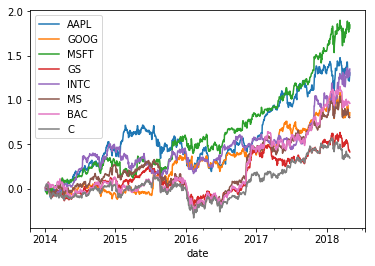

In [145]:
px = px.asfreq('B').fillna(method='pad')
rets = px.pct_change()
((1 + rets).cumprod() - 1).plot()

In [146]:
def calc_mom(price, lookback, lag):
    mom_ret = price.shift(lag).pct_change(lookback)
    ranks = mom_ret.rank(axis=1, ascending=False)
    demeaned = ranks.subtract(ranks.mean(axis=1), axis=0)
    return demeaned.divide(demeaned.std(axis=1), axis=0)

In [147]:
compound = lambda x : (1 + x).prod() - 1
daily_sr = lambda x: x.mean() / x.std()

def strat_sr(prices, lb, hold):
    # Compute portfolio weights
    freq = '%dB' % hold
    port = calc_mom(prices, lb, lag=1)

    daily_rets = prices.pct_change()

    # Compute portfolio returns
    port = port.shift(1).resample(freq, how='first')
    returns = daily_rets.resample(freq, how=compound)
    port_rets = (port * returns).sum(axis=1)

    return daily_sr(port_rets) * np.sqrt(252 / hold)

In [148]:
strat_sr(px, 70, 30)

/Users/robert.slater/test/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).first()
  if sys.path[0] == '':
/Users/robert.slater/test/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  del sys.path[0]


-0.42834274154649854

In [149]:
from collections import defaultdict

lookbacks = range(20, 90, 5)
holdings = range(20, 90, 5)
dd = defaultdict(dict)
for lb in lookbacks:
    for hold in holdings:
        dd[lb][hold] = strat_sr(px, lb, hold)

ddf = DataFrame(dd)
ddf.index.name = 'Holding Period'
ddf.columns.name = 'Lookback Period'

/Users/robert.slater/test/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).first()
  if sys.path[0] == '':
/Users/robert.slater/test/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  del sys.path[0]


In [150]:
import matplotlib.pyplot as plt

def heatmap(df, cmap=plt.cm.gray_r):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    axim = ax.imshow(df.values, cmap=cmap, interpolation='nearest')
    ax.set_xlabel(df.columns.name)
    ax.set_xticks(np.arange(len(df.columns)))
    ax.set_xticklabels(list(df.columns))
    ax.set_ylabel(df.index.name)
    ax.set_yticks(np.arange(len(df.index)))
    ax.set_yticklabels(list(df.index))
    plt.colorbar(axim)

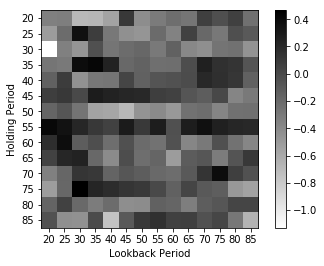

In [151]:
heatmap(ddf)
plt.show()

### Future contract rolling

In [152]:
pd.options.display.max_rows = 10

In [153]:
#import pandas.io.data as web
# Approximate price of S&P 500 index
px = web.DataReader('SPY','iex',start,end)['close'] * 10
px

5y


date
2015-01-02    1925.267
2015-01-05    1890.498
2015-01-06    1872.691
2015-01-07    1896.027
2015-01-08    1929.672
                ...   
2017-12-22    2664.432
2017-12-26    2661.244
2017-12-27    2662.539
2017-12-28    2668.017
2017-12-29    2657.958
Name: close, Length: 755, dtype: float64

In [154]:
from datetime import datetime
expiry = {'ESU2': datetime(2012, 9, 21),
          'ESZ2': datetime(2012, 12, 21)}
expiry = Series(expiry).sort_values()

In [155]:
expiry

ESU2   2012-09-21
ESZ2   2012-12-21
dtype: datetime64[ns]

In [156]:
np.random.seed(12347)
N = 200
walk = (np.random.randint(0, 200, size=N) - 100) * 0.25
perturb = (np.random.randint(0, 20, size=N) - 10) * 0.25
walk = walk.cumsum()

rng = pd.date_range(px.index[0], periods=len(px) + N, freq='B')
near = np.concatenate([px.values, px.values[-1] + walk])
far = np.concatenate([px.values, px.values[-1] + walk + perturb])
prices = DataFrame({'ESU2': near, 'ESZ2': far}, index=rng)

In [157]:
prices.tail()

,ESU2,ESZ2
2018-08-24,2687.208,2688.958
2018-08-27,2673.458,2675.708
2018-08-28,2681.458,2683.208
2018-08-29,2697.958,2697.208
2018-08-30,2677.958,2675.708


In [158]:
def get_roll_weights(start, expiry, items, roll_periods=5):
    # start : first date to compute weighting DataFrame
    # expiry : Series of ticker -> expiration dates
    # items : sequence of contract names

    dates = pd.date_range(start, expiry[-1], freq='B')
    weights = DataFrame(np.zeros((len(dates), len(items))),
                        index=dates, columns=items)

    prev_date = weights.index[0]
    for i, (item, ex_date) in enumerate(expiry.iteritems()):
        if i < len(expiry) - 1:
            weights.ix[prev_date:ex_date - pd.offsets.BDay(), item] = 1
            roll_rng = pd.date_range(end=ex_date - pd.offsets.BDay(),
                                     periods=roll_periods + 1, freq='B')

            decay_weights = np.linspace(0, 1, roll_periods + 1)
            weights.ix[roll_rng, item] = 1 - decay_weights
            weights.ix[roll_rng, expiry.index[i + 1]] = decay_weights
        else:
            weights.ix[prev_date:, item] = 1

        prev_date = ex_date

    return weights

In [159]:
weights = get_roll_weights('6/1/2012', expiry, prices.columns)
weights.loc['2012-09-12':'2012-09-21']

/Users/robert.slater/test/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]
/Users/robert.slater/test/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/robert.slater/test/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/robert.slater/test/lib/python3.6/site-packages/ipykernel_

,ESU2,ESZ2
2012-09-12,1.0,0.0
2012-09-13,1.0,0.0
2012-09-14,0.8,0.2
2012-09-17,0.6,0.4
2012-09-18,0.4,0.6
2012-09-19,0.2,0.8
2012-09-20,0.0,1.0
2012-09-21,0.0,1.0


In [160]:
rolled_returns = (prices.pct_change() * weights).sum(1)

### Rolling correlation and linear regression

In [161]:

aapl = web.DataReader('AAPL', 'iex', start, end)['close']
msft = web.DataReader('MSFT', 'iex', start, end)['close']

aapl_rets = aapl.pct_change()
msft_rets = msft.pct_change()

5y
5y


In [162]:

plt.figure()


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

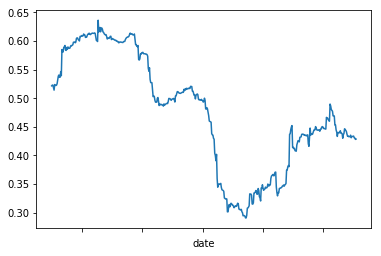

In [163]:
aapl_rets.rolling(250).corr(msft_rets).plot()

In [164]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [165]:
from pyfinance.ols import PandasRollingOLS
model = PandasRollingOLS(y=aapl_rets, x= msft_rets, window=250)
model.beta

,feature1
date,
2015-12-29,NaN
2015-12-30,0.493710
2015-12-31,0.492988
2016-01-04,0.493274
2016-01-05,0.490841
...,...
2017-12-22,0.525135
2017-12-26,0.527449
2017-12-27,0.527118


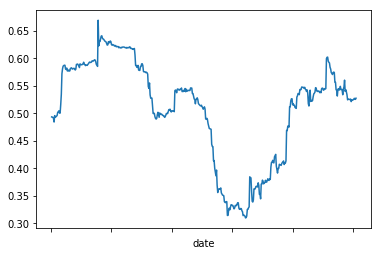

In [166]:
model.beta['feature1'].plot()

In [167]:
msft_rets

date
2015-01-02         NaN
2015-01-05   -0.009304
2015-01-06   -0.014571
2015-01-07    0.012707
2015-01-08    0.029417
                ...   
2017-12-22    0.000117
2017-12-26   -0.001286
2017-12-27    0.003630
2017-12-28    0.000117
2017-12-29   -0.002100
Name: close, Length: 755, dtype: float64